In [754]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [755]:
# read data
Housingprice = pd.read_csv(r"E:\Regression_assignment\train.csv")

In [756]:
Housingprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [757]:
Housingprice.shape

(1460, 81)

In [758]:
Housingprice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [759]:
Housingprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [760]:
round(((Housingprice.isnull().sum()/len(Housingprice))*100),2).head(50)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
Alley           93.77
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In [761]:
round(((Housingprice.isnull().sum()/len(Housingprice))*100),2).tail(40)

CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
dtype: float64

In [762]:
Housingprice['LotFrontage'] = Housingprice['LotFrontage'].replace(np.nan,Housingprice['LotFrontage'].mean())

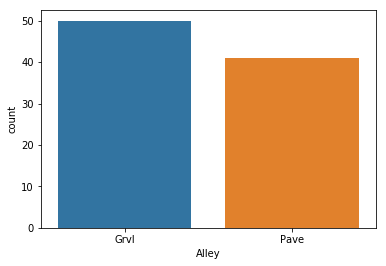

In [763]:
sns.countplot(Housingprice['Alley'])

In [764]:
Housingprice['Alley'] = Housingprice['Alley'].replace(np.nan,'No alley access')

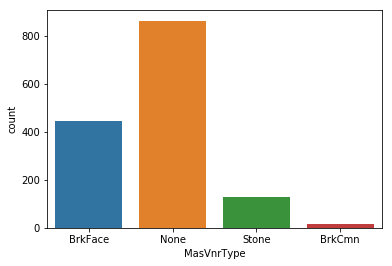

In [765]:
sns.countplot(Housingprice['MasVnrType'])

In [766]:
Housingprice['MasVnrType'] = Housingprice['MasVnrType'].replace(np.nan,'None')

In [767]:
Housingprice['MasVnrArea'] = Housingprice['MasVnrArea'].replace(np.nan,0)

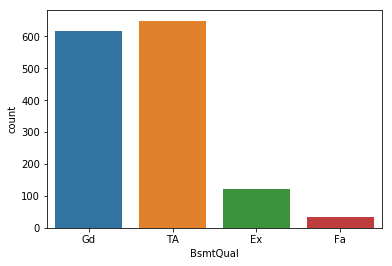

In [768]:
sns.countplot(Housingprice['BsmtQual'])

In [769]:
Housingprice['BsmtQual'] = Housingprice['BsmtQual'].replace(np.nan,'No Basement')

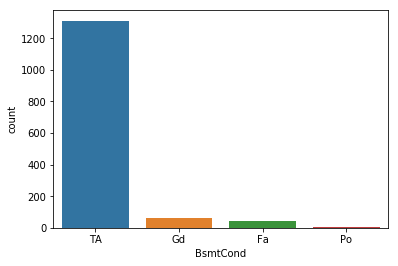

In [770]:
sns.countplot(Housingprice['BsmtCond'])

In [771]:
Housingprice['BsmtCond'] = Housingprice['BsmtCond'].replace(np.nan,'No Basement')

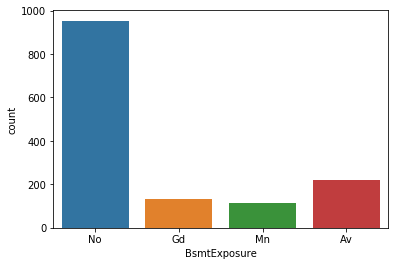

In [772]:
sns.countplot(Housingprice['BsmtExposure'])

In [773]:
Housingprice['BsmtExposure'] = Housingprice['BsmtExposure'].replace(np.nan,'No Basement')

In [774]:
Housingprice['BsmtFinType1'] = Housingprice['BsmtFinType1'].replace(np.nan,'No Basement')
Housingprice['BsmtFinType2'] = Housingprice['BsmtFinType2'].replace(np.nan,'No Basement')
Housingprice['GarageType'] = Housingprice['GarageType'].replace(np.nan,'No Garage')
Housingprice['GarageYrBlt'] = Housingprice['GarageYrBlt'].replace(np.nan,0)
Housingprice['GarageFinish'] = Housingprice['GarageFinish'].replace(np.nan,'No Garage')
Housingprice['GarageQual'] = Housingprice['GarageQual'].replace(np.nan,'No Garage')
Housingprice['GarageCond'] = Housingprice['GarageCond'].replace(np.nan,'No Garage')

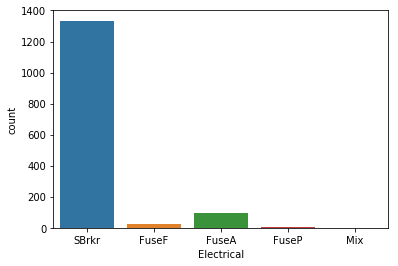

In [775]:
sns.countplot(Housingprice['Electrical'])

In [776]:
Housingprice['Electrical'] = Housingprice['Electrical'].replace(np.nan,'SBrkr')

In [777]:
Housingprice['FireplaceQu'] = Housingprice['FireplaceQu'].replace(np.nan,'No Fireplace')
Housingprice['PoolQC'] = Housingprice['PoolQC'].replace(np.nan,'No Pool')
Housingprice['Fence'] = Housingprice['Fence'].replace(np.nan,'No Fence')
Housingprice['MiscFeature'] = Housingprice['MiscFeature'].replace(np.nan,'None')

In [778]:
round(((Housingprice.isnull().sum()/len(Housingprice))*100),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [779]:
Housingprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


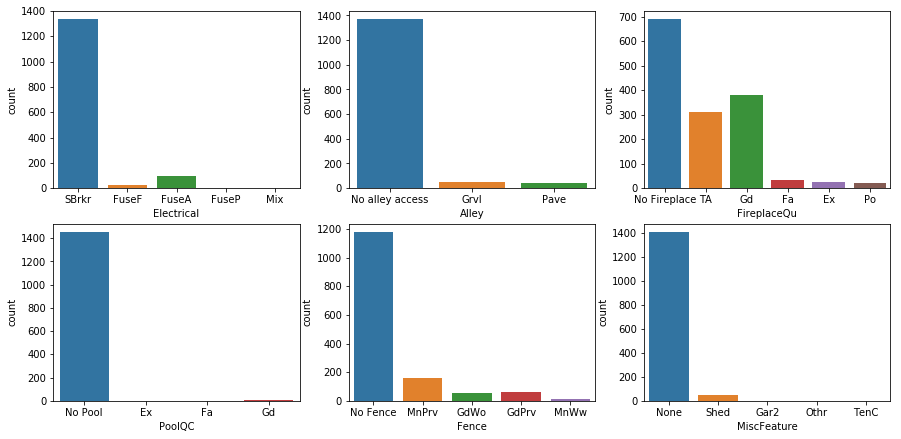

In [780]:
plt.figure(figsize = (15,15))
plt.subplot(4,3,1)
sns.countplot(Housingprice['Electrical'])
plt.subplot(4,3,2)
sns.countplot(Housingprice['Alley'])
plt.subplot(4,3,3)
sns.countplot(Housingprice['FireplaceQu'])
plt.subplot(4,3,4)
sns.countplot(Housingprice['PoolQC'])
plt.subplot(4,3,5)
sns.countplot(Housingprice['Fence'])
plt.subplot(4,3,6)
sns.countplot(Housingprice['MiscFeature'])

In [781]:
#We can see that the data is skewed,hence dropping above columns.
Housingprice=Housingprice.drop(['Id','Electrical','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [782]:
Housingprice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [783]:
Housingprice.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPor

In [784]:
Housingprice["YrSold"].value_counts().sum()

1460

In [785]:
Housingprice['YearBuilt_age'] = Housingprice.YearBuilt.max()-Housingprice.YearBuilt

In [786]:
Housingprice['YearRemodAdd_age'] = Housingprice.YearRemodAdd.max()-Housingprice.YearRemodAdd

In [787]:
Housingprice['YrSold_age'] = Housingprice.YrSold.max()-Housingprice.YrSold

In [788]:
Housingprice['GarageYrBlt_age'] = Housingprice.GarageYrBlt.max()-Housingprice.GarageYrBlt

In [789]:
#Removing YearBuilt,YearRemodAdd,YrSold and GarageYrBlt columns.
Housingprice=Housingprice.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)

In [790]:
Housingprice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,YrSold_age,GarageYrBlt_age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,7,7,2,7.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,34,34,3,34.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,9,8,2,9.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,95,40,4,12.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,10,10,2,10.0


In [791]:
#Getting the categorical data.
Housingprice_cat = Housingprice.select_dtypes(include=['object']).copy()

In [792]:
Housingprice_cat.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Y,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [793]:
Housingprice_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [794]:
# Generating Dummies
Housingprice_dummy_cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir','KitchenQual','Functional', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','SaleType', 'SaleCondition']

In [795]:
dummy_vals=pd.get_dummies(Housingprice[Housingprice_dummy_cols],drop_first=True)
dummy_vals.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [796]:
#Merging Dummies with actual dataset
Housingprice = pd.concat([Housingprice, dummy_vals], axis=1)
Housingprice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [797]:
#Dropping Original Columns, since wer have generated dummies
Housingprice = Housingprice.drop(Housingprice_dummy_cols, axis = 1)

In [798]:
Housingprice.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [799]:
# all numeric (float and int) variables in the dataset
Housingprice_num = Housingprice.select_dtypes(include=['float64', 'int64'])
Housingprice_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,YrSold_age,GarageYrBlt_age
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,2,208500,7,7,2,7.0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,5,181500,34,34,3,34.0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,9,223500,9,8,2,9.0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,2,140000,95,40,4,12.0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,12,250000,10,10,2,10.0


In [800]:
# correlation matrix
Housingprice_cor = Housingprice_num.corr()
Housingprice_cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,YrSold_age,GarageYrBlt_age
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.027850,-0.040581,0.021407,0.080997
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.178699,0.215828,0.043340,0.122156,0.363358,...,0.062335,0.037684,0.180868,0.001168,0.010158,0.334901,-0.117598,-0.082746,-0.006768,-0.100259
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,...,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014228,-0.013788,0.014261,-0.072599
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,...,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572323,-0.550684,0.027347,-0.288998
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,...,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.375983,-0.073741,-0.043950,0.006515
MasVnrArea,0.023573,0.178699,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,...,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.311600,-0.176529,0.008317,-0.132696
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,...,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.249503,-0.128451,-0.014359,-0.115843
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,...,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.049107,0.067759,-0.031706,-0.035070
BsmtUnfSF,-0.140759,0.122156,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,...,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479,-0.149040,-0.181133,0.041258,-0.042720
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,...,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581,-0.391452,-0.291066,0.014969,-0.176359


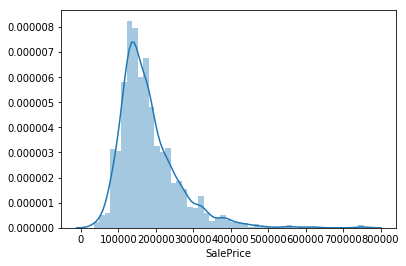

In [801]:
# target variable: price of car
sns.distplot(Housingprice_num['SalePrice'])
plt.show()

In [802]:
# Storing Target variable into different variable
y=Housingprice['SalePrice']

In [803]:
# Storing Main Features in different Variable
X=Housingprice.drop(['SalePrice'], axis=1)

In [804]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [805]:
y=np.log(y)

In [806]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [807]:
X = X.drop(['RoofMatl_CompShg','GrLivArea','RoofMatl_WdShngl','RoofMatl_Tar&Grv','RoofMatl_WdShake'],axis=1)

In [808]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

In [809]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [810]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [811]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009175,0.003908,0.000199,0.000398,0.0001,{'alpha': 0.0001},-0.105651,-0.092728,-0.105807,-0.090526,...,-0.098301,0.006393,27,-0.066769,-0.056287,-0.067593,-0.070165,-0.068800,-0.065923,0.004952
1,0.006185,0.000399,0.000598,0.000488,0.001,{'alpha': 0.001},-0.105645,-0.092727,-0.105803,-0.090525,...,-0.098297,0.006391,26,-0.066770,-0.056287,-0.067592,-0.070165,-0.068799,-0.065922,0.004952
2,0.006782,0.000746,0.000199,0.000399,0.01,{'alpha': 0.01},-0.105593,-0.092722,-0.105763,-0.090515,...,-0.098267,0.006375,25,-0.066777,-0.056287,-0.067585,-0.070165,-0.068791,-0.065921,0.004951
3,0.006383,0.000489,0.000598,0.000489,0.05,{'alpha': 0.05},-0.105423,-0.092700,-0.105615,-0.090470,...,-0.098157,0.006324,24,-0.066812,-0.056291,-0.067559,-0.070165,-0.068764,-0.065918,0.004946
4,0.006783,0.000747,0.000399,0.000489,0.1,{'alpha': 0.1},-0.105258,-0.092676,-0.105478,-0.090410,...,-0.098052,0.006279,23,-0.066849,-0.056296,-0.067547,-0.070166,-0.068741,-0.065920,0.004942


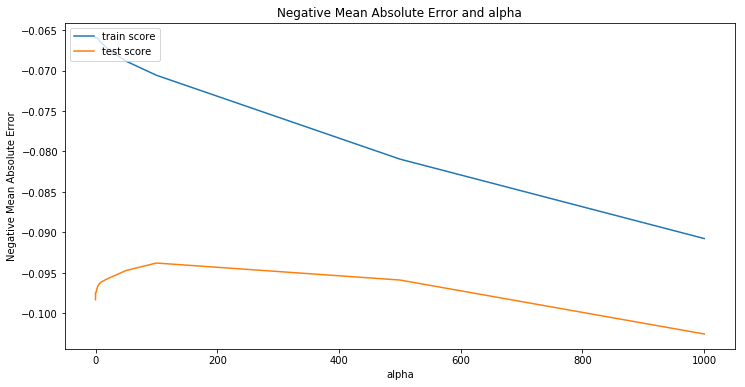

In [812]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [813]:
model_cv.best_score_

-0.09377403918064153

In [814]:
model_cv.best_params_

{'alpha': 100}

In [831]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [832]:
from sklearn.metrics import r2_score
# predict
y_train_prediction = ridge.predict(X_train)

In [833]:
print(r2_score(y_train, y_train_prediction))

0.9278271800980945


In [834]:
y_test_prediction = ridge.predict(X_test)
print(r2_score(y_test, y_test_prediction))

0.8766988948348804


In [835]:
pd.Series(ridge.coef_,index = X.columns).sort_values(ascending=False)

OverallQual             0.063074
1stFlrSF                0.053068
2ndFlrSF                0.048712
GarageCars              0.030050
OverallCond             0.030043
TotRmsAbvGrd            0.024822
FullBath                0.024697
MSZoning_RL             0.024048
Neighborhood_NridgHt    0.023856
Neighborhood_Crawfor    0.023456
LotArea                 0.022157
BsmtFullBath            0.021351
TotalBsmtSF             0.019233
Fireplaces              0.018837
CentralAir_Y            0.018069
Neighborhood_NoRidge    0.017928
Condition1_Norm         0.017914
Neighborhood_Somerst    0.017309
SaleCondition_Normal    0.016592
HalfBath                0.016256
BsmtExposure_Gd         0.015407
SaleType_ConLD          0.014973
Exterior1st_BrkFace     0.013814
Neighborhood_StoneBr    0.013738
GarageArea              0.013240
BedroomAbvGr            0.013202
WoodDeckSF              0.012933
MSZoning_FV             0.011854
MSZoning_RM             0.011769
Foundation_PConc        0.011589
          

In [836]:
lasso = Lasso()

# cross validation
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [837]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009175,0.003908,0.000199,0.000398,0.0001,{'alpha': 0.0001},-0.105651,-0.092728,-0.105807,-0.090526,...,-0.098301,0.006393,27,-0.066769,-0.056287,-0.067593,-0.070165,-0.068800,-0.065923,0.004952
1,0.006185,0.000399,0.000598,0.000488,0.001,{'alpha': 0.001},-0.105645,-0.092727,-0.105803,-0.090525,...,-0.098297,0.006391,26,-0.066770,-0.056287,-0.067592,-0.070165,-0.068799,-0.065922,0.004952
2,0.006782,0.000746,0.000199,0.000399,0.01,{'alpha': 0.01},-0.105593,-0.092722,-0.105763,-0.090515,...,-0.098267,0.006375,25,-0.066777,-0.056287,-0.067585,-0.070165,-0.068791,-0.065921,0.004951
3,0.006383,0.000489,0.000598,0.000489,0.05,{'alpha': 0.05},-0.105423,-0.092700,-0.105615,-0.090470,...,-0.098157,0.006324,24,-0.066812,-0.056291,-0.067559,-0.070165,-0.068764,-0.065918,0.004946
4,0.006783,0.000747,0.000399,0.000489,0.1,{'alpha': 0.1},-0.105258,-0.092676,-0.105478,-0.090410,...,-0.098052,0.006279,23,-0.066849,-0.056296,-0.067547,-0.070166,-0.068741,-0.065920,0.004942


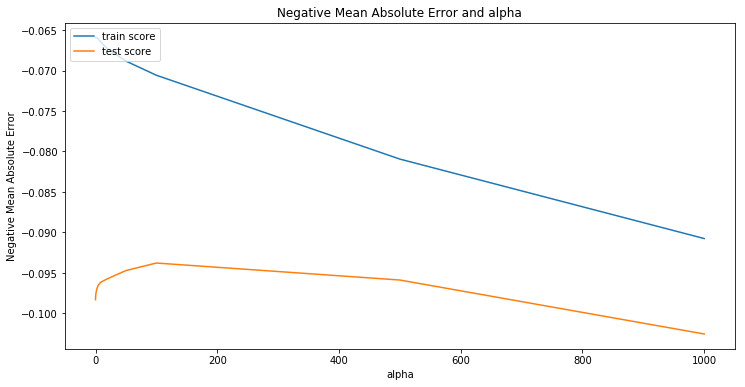

In [838]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [839]:
model_cv2.best_score_

-0.09118862470738967

In [840]:
model_cv2.best_params_

{'alpha': 0.001}

In [841]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [842]:
y_train_prediction_lasso = lasso.predict(X_train)

In [847]:
z = print(r2_score(y_train, y_train_prediction_lasso))

0.9323043293972912


In [848]:
p = exp(z)
print(p)

NameError: name 'exp' is not defined

In [844]:
y_test_prediction_lasso = ridge.predict(X_test)
print(r2_score(y_test, y_test_prediction_lasso))

0.8766988948348804


In [845]:
coef = lasso.coef_

In [846]:
pd.Series(coef,index = X.columns).sort_values(ascending=False)

2ndFlrSF                    0.098830
1stFlrSF                    0.097554
MSZoning_RL                 0.082616
OverallQual                 0.074907
MSZoning_RM                 0.055937
GarageCars                  0.042527
MSZoning_FV                 0.037202
OverallCond                 0.032998
BsmtFullBath                0.026194
Neighborhood_Crawfor        0.025837
Neighborhood_NridgHt        0.025671
Condition1_Norm             0.023160
Neighborhood_Somerst        0.022711
LotArea                     0.021969
MSZoning_RH                 0.021846
BsmtExposure_Gd             0.016761
CentralAir_Y                0.016702
SaleCondition_Normal        0.016455
FullBath                    0.015173
Neighborhood_NoRidge        0.014347
Exterior1st_VinylSd         0.014294
SaleType_ConLD              0.013855
Fireplaces                  0.013736
Neighborhood_StoneBr        0.012465
Exterior1st_BrkFace         0.012238
Neighborhood_ClearCr        0.011872
Foundation_PConc            0.011751
W